In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import scipy.stats as stats

# Здесь представлена визуализация и проведение статистических тестов на основе данных(взяты с kaggle)

In [8]:
#### ссылка на датасет https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales/data
df= pd.read_csv('supermarket_sales - Sheet1.csv')
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [9]:
df['City'].unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

## Визуализация

In [12]:
df0=df.groupby(['City']).agg(Total_count=('Total','count'),Total_sales=('Total','sum')).reset_index()
df0

,City,Total_count,Total_sales
0,Mandalay,332,106197.6720
1,Naypyitaw,328,110568.7065
2,Yangon,340,106200.3705


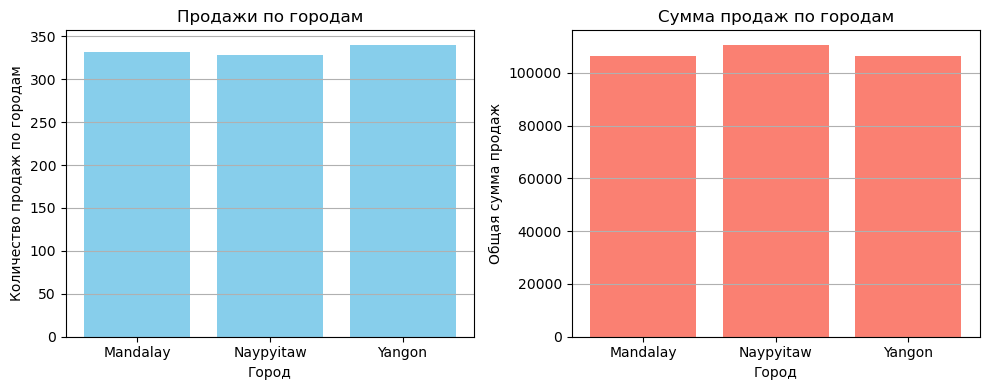

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))  

# Первый график
ax[0].bar(df0['City'], df0['Total_count'], color='skyblue')
ax[0].set_xlabel('Город')
ax[0].set_ylabel('Количество продаж по городам')
ax[0].set_title('Продажи по городам')
ax[0].grid(axis='y')

# Второй график 
ax[1].bar(df0['City'], df0['Total_sales'], color='salmon')
ax[1].set_xlabel('Город')
ax[1].set_ylabel('Общая сумма продаж')
ax[1].set_title('Сумма продаж по городам')
ax[1].grid(axis='y')

plt.tight_layout()  
plt.show()

In [14]:
df.groupby(['Gender']).agg(Total_count=('Total','count'),Total_sales=('Total','sum')).reset_index()

,Gender,Total_count,Total_sales
0,Female,501,167882.925
1,Male,499,155083.824


In [15]:
df3=df.groupby(['Payment']).agg(PaymentCount =('Payment','count')).sort_values(by= 'PaymentCount', ascending=False).reset_index()
df3

,Payment,PaymentCount
0,Ewallet,345
1,Cash,344
2,Credit card,311


Text(0, 0.5, 'Количество оплат')

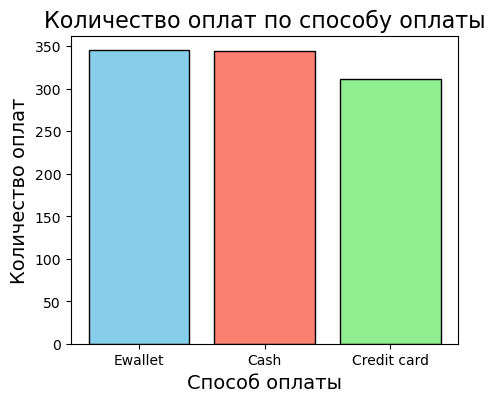

In [16]:
plt.figure(figsize=(5,4))
colors = ['skyblue', 'salmon', 'lightgreen', 'gold']  # Цвета для столбцов
plt.bar(df3['Payment'], df3['PaymentCount'], color=colors, edgecolor='black')

plt.title('Количество оплат по способу оплаты', fontsize=16)
plt.xlabel('Способ оплаты', fontsize=14)
plt.ylabel('Количество оплат', fontsize=14)

In [17]:
df1 = df.groupby(['City', 'Gender']).agg(Total_count=('Total', 'count'), Total_sales=('Total', 'sum')).reset_index()
df1

,City,Gender,Total_count,Total_sales
0,Mandalay,Female,162,52928.2950
1,Mandalay,Male,170,53269.3770
2,Naypyitaw,Female,178,61685.4630
3,Naypyitaw,Male,150,48883.2435
4,Yangon,Female,161,53269.1670
5,Yangon,Male,179,52931.2035


In [25]:
df2 = df.groupby(['City']).agg(CountCity =('City','count')).sort_values(by= 'CountCity', ascending=False).head(15).reset_index()
df2 

,City,CountCity
0,Yangon,340
1,Mandalay,332
2,Naypyitaw,328


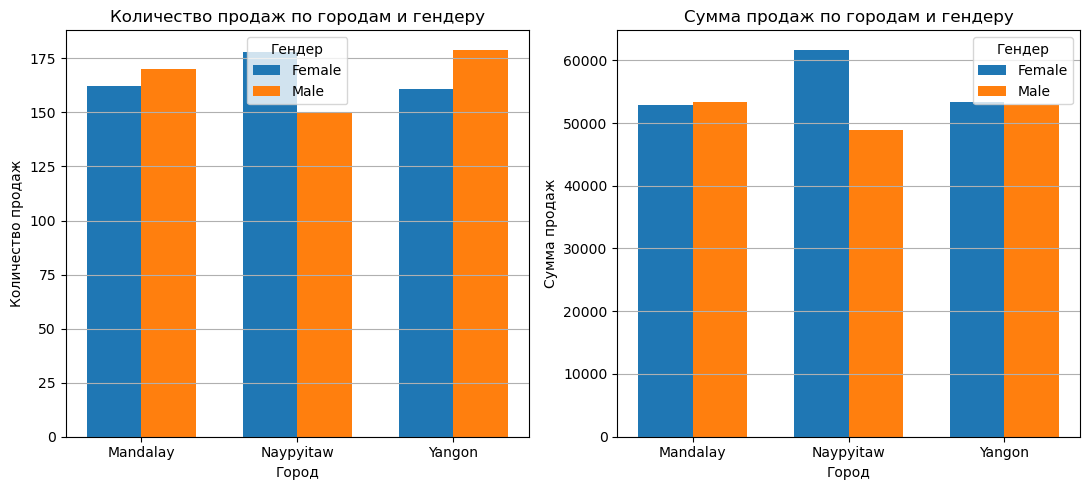

In [35]:
cities = df1['City'].unique()
genders = df1['Gender'].unique()
bar_width = 0.35  
x = np.arange(len(cities))

fig, ax = plt.subplots(1, 2, figsize=(11, 5))

# Первый график: Количество продаж
for i, gender in enumerate(genders):
    gender_data = df1[df1['Gender'] == gender]
    ax[0].bar(x + i * bar_width, gender_data['Total_count'], bar_width, label=gender)

ax[0].set_xticks(x + bar_width / 2) 
ax[0].set_xticklabels(cities) 
ax[0].set_xlabel('Город')
ax[0].set_ylabel('Количество продаж')
ax[0].set_title('Количество продаж по городам и гендеру')
ax[0].legend(title='Гендер')
ax[0].grid(axis='y')

# Второй график: Сумма продаж
for i, gender in enumerate(genders):
    gender_data = df1[df1['Gender'] == gender]
    ax[1].bar(x + i * bar_width, gender_data['Total_sales'], bar_width, label=gender)

ax[1].set_xticks(x + bar_width / 2)
ax[1].set_xticklabels(cities)
ax[1].set_xlabel('Город')
ax[1].set_ylabel('Сумма продаж')
ax[1].set_title('Сумма продаж по городам и гендеру')
ax[1].legend(title='Гендер')
ax[1].grid(axis='y')

plt.tight_layout() 
plt.show()


In [53]:
df4 = df.groupby(['Product line']).agg(Rating =('Rating','mean')).sort_values(by='Rating',ascending=False).reset_index()
df4 

,Product line,Rating
0,Food and beverages,7.113218
1,Fashion accessories,7.029213
2,Health and beauty,7.003289
3,Electronic accessories,6.924706
4,Sports and travel,6.916265
5,Home and lifestyle,6.837500


C:\Users\user\AppData\Local\Temp\ipykernel_22336\4171920703.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rating', y='Product line', data=df4, palette='magma')


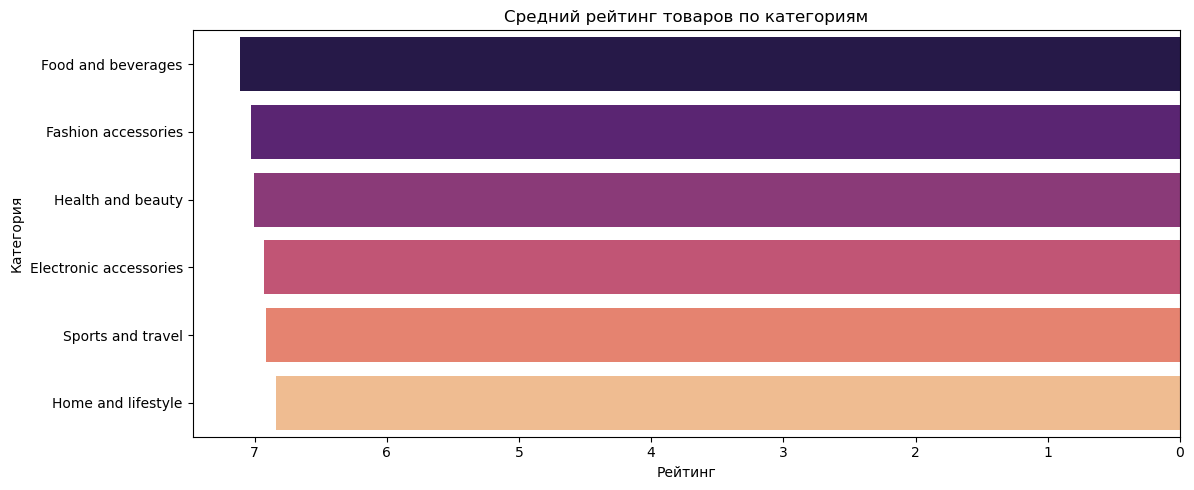

In [61]:
plt.figure(figsize=(12, 5))
sns.barplot(x='Rating', y='Product line', data=df4, palette='magma')
plt.title('Cредний рейтинг товаров по категориям')
plt.xlabel('Рейтинг')
plt.ylabel('Категория')
plt.tight_layout()
plt.gca().invert_xaxis()
plt.show()

### Проведем t-test на проверку средних


In [37]:
### Т-тест между между мужчинами и женщинами в городах
for i in df['City'].unique():
    print(i)
    group_0 = df[(df['City'] == i) & (df['Gender'] == 'Male')]['Total']
    group_1 = df[(df['City'] == i) & (df['Gender'] == 'Female')]['Total']
    s, p = ttest_ind(group_0, group_1, equal_var=False)  
    if p < 0.05:
        print('Средние не равны (p < 0.05)')
    else:
        print('Средние равны (p >= 0.05)')
    print(f"P-value: {p:.5f}")
    print()

Yangon
Средние равны (p >= 0.05)
P-value: 0.16295

Naypyitaw
Средние равны (p >= 0.05)
P-value: 0.47962

Mandalay
Средние равны (p >= 0.05)
P-value: 0.61678



In [63]:
### Т-тест между между городами
cities = df['City'].unique()

for i, city1 in enumerate(cities):
    for city2 in cities[i + 1:]:
        print(f"Сравнение: {city1} vs {city2}")
        group_1 = df[df['City'] == city1]['Total']
        group_2 = df[df['City'] == city2]['Total']
        s, p = ttest_ind(group_1, group_2, equal_var=False)  # Используем t-test
        if p < 0.05:
            print('Средние не равны (p < 0.05)')
        else:
            print('Средние равны (p >= 0.05)')
        print(f"P-value: {p:.5f}")
        print()


Сравнение: Yangon vs Naypyitaw
Средние равны (p >= 0.05)
P-value: 0.19810

Сравнение: Yangon vs Mandalay
Средние равны (p >= 0.05)
P-value: 0.68131

Сравнение: Naypyitaw vs Mandalay
Средние равны (p >= 0.05)
P-value: 0.38224

